In [6]:
import pandas as pd
import time #to have today's date
timestr = time.strftime("%Y%m%d")
import matplotlib.pyplot as plt #for plots
import sklearn
import scipy.cluster.hierarchy as shc # for dendrogram
var_text_size = 15 #for font size in graphs

In [2]:
var_time_a = '20220517'

In [3]:
#for each country the percentage for each topic
df_country_topics_share = pd.read_csv('.//results//master_dfs//country_topics_share_'+var_time_a+'_V01.csv',
    sep=';', decimal=',', index_col=0)
#so here we have 12 vectors (countries) with 22 dimensions (topics) 

In [4]:
list_countries = list(df_country_topics_share['Country'])

In [5]:
df_country_topics_share_T = df_country_topics_share.set_index('Country').transpose()

### get a similarity/distance matrix

In [8]:
#pd.DataFrame.corr(): https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
#Pearson:  linear correlation between two sets of data. -1 (negative corr), 0 (no corr) and 1 (positve corr)


In [9]:
#df.corr : Compute pairwise correlation of columns, excluding NA/null values.
df_pearson = df_country_topics_share_T.corr() #default: method='pearson'
df_kendall = df_country_topics_share_T.corr(method = 'kendall')

In [10]:
df_c_s = df_country_topics_share.set_index('Country')

In [11]:
from scipy.spatial import distance_matrix
#Matrix containing the distance from every vector in x to every vector in y.
df_distance = pd.DataFrame(distance_matrix(df_c_s.values, df_c_s.values), index=df_c_s.index, columns=df_c_s.index)

df_distance_p1 = pd.DataFrame(distance_matrix(df_c_s.values, df_c_s.values, p=1), index=df_c_s.index, columns=df_c_s.index)

### show dendrogram

shc.linkage : The input y may be either a 1-D condensed distance matrix or a 2-D array of observation vectors.

If y is a 1-D condensed distance matrix, then y must be a
sized vector, where n is the number of original observations paired in the distance matrix. The behavior of this function is very similar to the MATLAB linkage function.d

c:\users\mann\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:11: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  # This is added back by InteractiveShellApp.init_path()


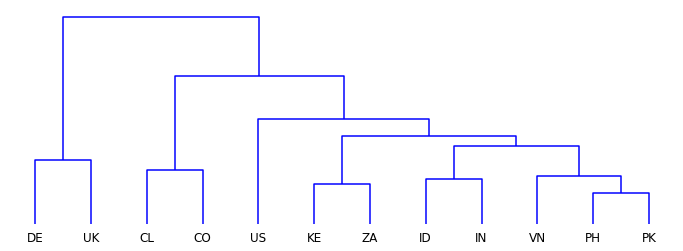

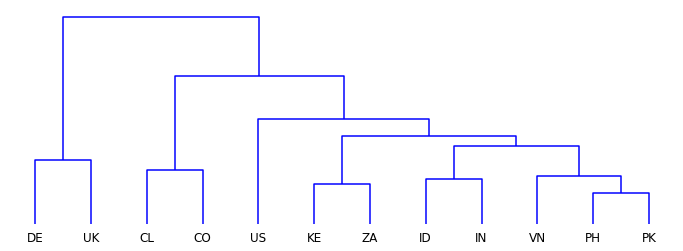

In [15]:
#that's the one I use in the paper!!!!!
#with df_distance_p1 (p=1)
dict_color_threshold = {1:'all', 33:'1'} #whn putting 1, I will have different colors. When putting 33 I have only one color
for c in dict_color_threshold:
#plot the graph
    fig, ax1 = plt.subplots(figsize=(12,4))

    #remove spines
    for x in ['top', 'bottom', 'right', 'left']: 
        ax1.spines[x].set_visible(False) 

    Z = shc.linkage(df_distance_p1, method ='ward')
    Dendrogram = shc.dendrogram(Z, labels=list_countries, color_threshold=c)

    #remove ticks and labels on the y axis
    ax1.tick_params(left = False, labelleft = False)

    #save
    plt.savefig('.//results//TSNE//df_distance_p1_'+dict_color_threshold[c]+'_color_'+timestr+'_V01.svg', \
                       bbox_inches="tight")

    plt.show()

c:\users\mann\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:11: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  # This is added back by InteractiveShellApp.init_path()


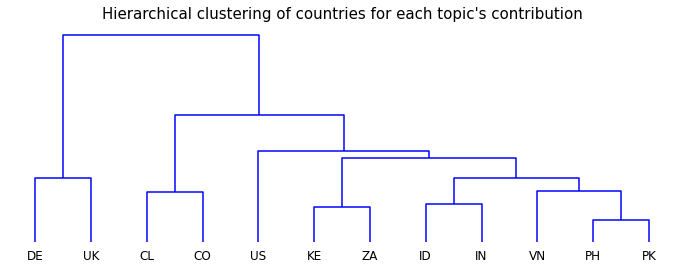

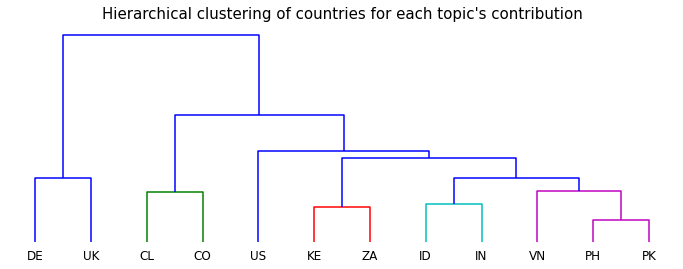

In [14]:
#with df_distance
dict_color_threshold = {1:'all', 33:'1'} #whn putting 1, I will have different colors. When putting 33 I have only one color
for c in dict_color_threshold:
#plot the graph
    fig, ax1 = plt.subplots(figsize=(12,4))

    #remove spines
    for x in ['top', 'bottom', 'right', 'left']: 
        ax1.spines[x].set_visible(False) 

    Z = shc.linkage(df_distance, method ='ward')
    Dendrogram = shc.dendrogram(Z, labels=list_countries, color_threshold=c)

    #remove ticks and labels on the y axis
    ax1.tick_params(left = False, labelleft = False)
    
    #title
    ax1.set_title("Hierarchical clustering of countries for each topic's contribution", fontsize=var_text_size)

    #save
    plt.savefig('.//results//TSNE//dendrogram_df_distance_'+dict_color_threshold[c]+'_color_'+timestr+'_V01.svg', \
                       bbox_inches="tight")

    plt.show()